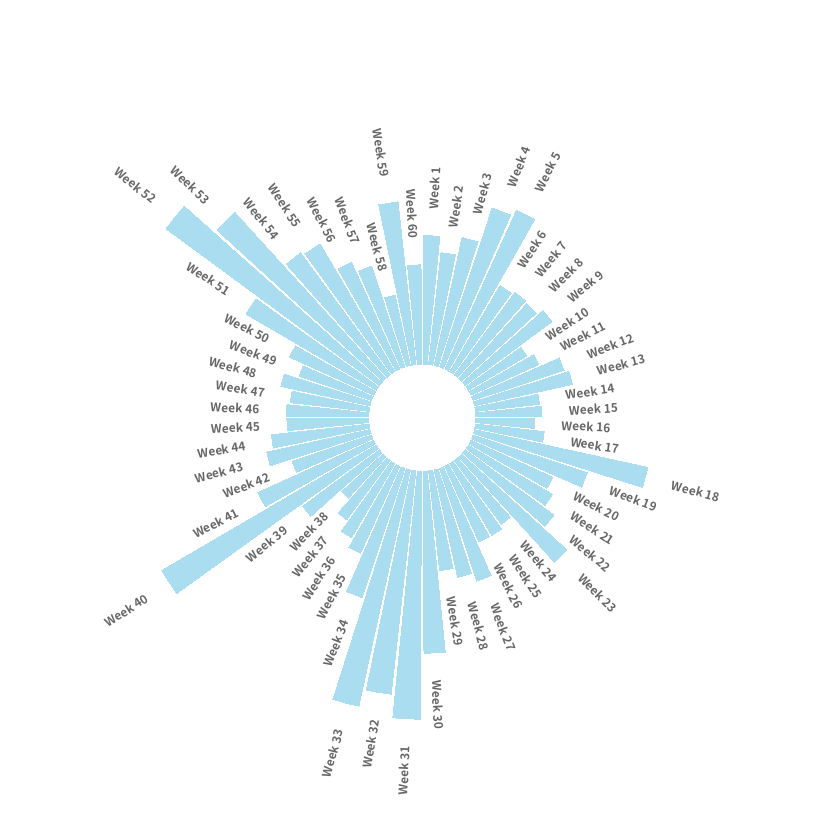

In [1]:
# Libraries
#library(tidyverse)
library(jsonlite)
library(ggplot2)
setwd('/home/ubuntu/movie/raw_data/daily')
vector = c()
vector2 = c()
vector3 = c()

file_list <- list.files(path='/home/ubuntu/movie/raw_data/daily',pattern = "json")
# file_list[[1]]
# for(list in file_list){
#   data = fromJSON(list)
#   data = data.frame(data)
#   data2 = as.numeric(data$boxOfficeResult.dailyBoxOfficeList.audiCnt)
#   data3 = as.character(data$boxOfficeResult.showRange[1])
#   data3 = substr(data3,1,8)
#   sumdata <- sum(data2)
#   vector <- append(vector,sumdata)
#   vector2 <- append(vector2, data3)
# }
# matrix1 <- cbind(vector,vector2)
chk = 1
cnt=1

for(list in file_list){
    data = fromJSON(list)
    data = data.frame(data)
    data2 = as.numeric(data$boxOfficeResult.dailyBoxOfficeList.audiCnt)    
    sumdata <- sum(data2)
    
    if(chk%%7 == 0){
        cnt
        vector <- append(vector,sumdata)
        sumvec <- sum(vector)
        vector2 <- append(vector2,sumvec)
        
        vector3 <- append(vector3,cnt)
        vector = c()
        cnt=cnt+1
    }else{
        vector <- append(vector,sumdata)
    }
    
    chk=chk+1
}
data_cnt <- data.frame(vector3)


#Create dataset
data=data.frame(
  id=seq(1,length(vector2)),
  individual=paste( "Week ", seq(1,length(vector2)), sep=""),
  value = 100*vector2/max(vector2)
)
 
# # Make the plot
# p = ggplot(data, aes(x=as.factor(id), y=value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
#   # This add the bars with a blue color
#   geom_bar(stat="identity", fill=alpha("blue", 0.3)) +
  
#   # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
#   ylim(-20,120) +
  
#   # Custom the theme: no axis title and no cartesian grid
#   theme_minimal() +
#   theme(
#     axis.text = element_blank(),
#     axis.title = element_blank(),
#     panel.grid = element_blank(),
#     plot.margin = unit(rep(0,1000), "cm")     # This remove unnecessary margin around plot
#   ) +
  
#   # This makes the coordinate polar instead of cartesian.
#     coord_polar(start = 0)
# p
 
# ----- This section prepare a dataframe for labels ---- #
# Get the name and the y position of each label
label_data=data
 
# calculate the ANGLE of the labels
number_of_bar=nrow(label_data)
angle= 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse( angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)
# ----- ------------------------------------------- ---- #
 
 
# Start the plot
p = ggplot(data, aes(x=as.factor(id), y=value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  # This add the bars with a blue color
  geom_bar(stat="identity", fill=alpha("skyblue", 0.7)) +
  
  # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-20,120) +
  
  # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm")      # Adjust the margin to make in sort labels are not truncated!
  ) +
  
  # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0) +
  
  # Add the labels, using the label_data dataframe that we have created before
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p

In [3]:
vector

[1] 584892 255466 250854 632777

In [4]:
file_list

[1] "20170101.json" "20170102.json" "20170103.json" "20170104.json"
  [5] "20170105.json" "20170106.json" "20170107.json" "20170108.json"
  [9] "20170109.json" "20170110.json" "20170111.json" "20170112.json"
 [13] "20170113.json" "20170114.json" "20170115.json" "20170116.json"
 [17] "20170117.json" "20170118.json" "20170119.json" "20170120.json"
 [21] "20170121.json" "20170122.json" "20170123.json" "20170124.json"
 [25] "20170125.json" "20170126.json" "20170127.json" "20170128.json"
 [29] "20170129.json" "20170130.json" "20170131.json" "20170201.json"
 [33] "20170202.json" "20170203.json" "20170204.json" "20170205.json"
 [37] "20170206.json" "20170207.json" "20170208.json" "20170209.json"
 [41] "20170210.json" "20170211.json" "20170212.json" "20170213.json"
 [45] "20170214.json" "20170215.json" "20170216.json" "20170217.json"
 [49] "20170218.json" "20170219.json" "20170220.json" "20170221.json"
 [53] "20170222.json" "20170223.json" "20170224.json" "20170225.json"
 [57] "20170226.json" "20170227.json" "20170228.json" "20170301.json"
 [61] "20170302.json" "20170303.json" "20170304.json" "20170305.json"
 [65] "20170306.json" "20170307.json" "20170308.json" "20170309.json"
 [69] "20170310.json" "20170311.json" "20170312.json" "20170313.json"
 [73] "20170314.json" "20170315.json" "20170316.json" "20170317.json"
 [77] "20170318.json" "20170319.json" "20170320.json" "20170321.json"
 [81] "20170322.json" "20170323.json" "20170324.json" "20170325.json"
 [85] "20170326.json" "20170327.json" "20170328.json" "20170329.json"
 [89] "20170330.json" "20170331.json" "20170401.json" "20170402.json"
 [93] "20170403.json" "20170404.json" "20170405.json" "20170406.json"
 [97] "20170407.json" "20170408.json" "20170409.json" "20170410.json"
[101] "20170411.json" "20170412.json" "20170413.json" "20170414.json"
[105] "20170415.json" "20170416.json" "20170417.json" "20170418.json"
[109] "20170419.json" "20170420.json" "20170421.json" "20170422.json"
[113] "20170423.json" "20170424.json" "20170425.json" "20170426.json"
[117] "20170427.json" "20170428.json" "20170429.json" "20170430.json"
[121] "20170501.json" "20170502.json" "20170503.json" "20170504.json"
[125] "20170505.json" "20170506.json" "20170507.json" "20170508.json"
[129] "20170509.json" "20170510.json" "20170511.json" "20170512.json"
[133] "20170513.json" "20170514.json" "20170515.json" "20170516.json"
[137] "20170517.json" "20170518.json" "20170519.json" "20170520.json"
[141] "20170521.json" "20170522.json" "20170523.json" "20170524.json"
[145] "20170525.json" "20170526.json" "20170527.json" "20170528.json"
[149] "20170529.json" "20170530.json" "20170531.json" "20170601.json"
[153] "20170602.json" "20170603.json" "20170604.json" "20170605.json"
[157] "20170606.json" "20170607.json" "20170608.json" "20170609.json"
[161] "20170610.json" "20170611.json" "20170612.json" "20170613.json"
[165] "20170614.json" "20170615.json" "20170616.json" "20170617.json"
[169] "20170618.json" "20170619.json" "20170620.json" "20170621.json"
[173] "20170622.json" "20170623.json" "20170624.json" "20170625.json"
[177] "20170626.json" "20170627.json" "20170628.json" "20170629.json"
[181] "20170630.json" "20170701.json" "20170702.json" "20170703.json"
[185] "20170704.json" "20170705.json" "20170706.json" "20170707.json"
[189] "20170708.json" "20170709.json" "20170710.json" "20170711.json"
[193] "20170712.json" "20170713.json" "20170714.json" "20170715.json"
[197] "20170716.json" "20170717.json" "20170718.json" "20170719.json"
[201] "20170720.json" "20170721.json" "20170722.json" "20170723.json"
[205] "20170724.json" "20170725.json" "20170726.json" "20170727.json"
[209] "20170728.json" "20170729.json" "20170730.json" "20170731.json"
[213] "20170801.json" "20170802.json" "20170803.json" "20170804.json"
[217] "20170805.json" "20170806.json" "20170807.json" "20170808.json"
[221] "20170809.json" "20170810.json" "20170811.json" "20170812.json"
[225] "20170813.json" "20170814.json" "20170815.json" "20170816.json"
[229] "20170

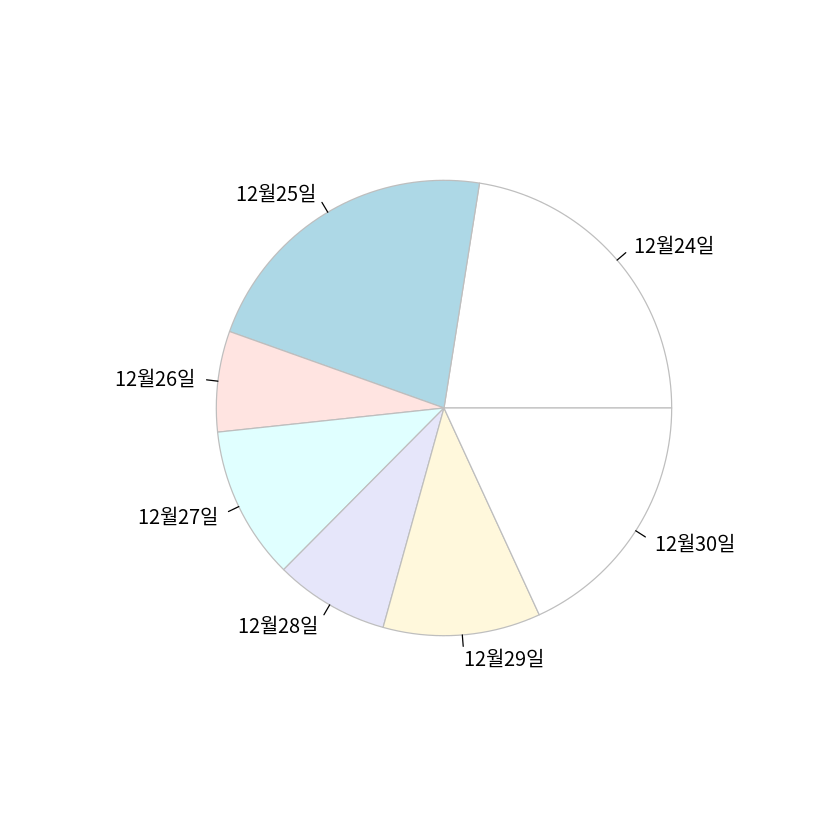

In [5]:
vector = c()
for(i in 358:364){
    data = fromJSON(file_list[[i]])
    data = data.frame(data)
    data2 = as.numeric(data$boxOfficeResult.dailyBoxOfficeList.audiCnt)    
    sumdata <- sum(data2)
    vector <- append(vector,sumdata)
}
#pie(vector, labels = vector,  , border="grey" )
pie(vector, labels = c("12월24일","12월25일","12월26일","12월27일","12월28일","12월29일","12월30일")  , border="grey" )

In [6]:
vector

[1] 2048053 2005626  650045  989145  739603 1017390 1649663

In [7]:
library(jsonlite)
library(ggplot2)
setwd('/home/ubuntu/movie/raw_data/daily')
vector = c()
data = fromJSON('20171224.json')
data = data.frame(data)
data

boxOfficeResult.boxofficeType,boxOfficeResult.showRange,boxOfficeResult.dailyBoxOfficeList.rnum,boxOfficeResult.dailyBoxOfficeList.rank,boxOfficeResult.dailyBoxOfficeList.rankInten,boxOfficeResult.dailyBoxOfficeList.rankOldAndNew,boxOfficeResult.dailyBoxOfficeList.movieCd,boxOfficeResult.dailyBoxOfficeList.movieNm,boxOfficeResult.dailyBoxOfficeList.openDt,boxOfficeResult.dailyBoxOfficeList.salesAmt,boxOfficeResult.dailyBoxOfficeList.salesShare,boxOfficeResult.dailyBoxOfficeList.salesInten,boxOfficeResult.dailyBoxOfficeList.salesChange,boxOfficeResult.dailyBoxOfficeList.salesAcc,boxOfficeResult.dailyBoxOfficeList.audiCnt,boxOfficeResult.dailyBoxOfficeList.audiInten,boxOfficeResult.dailyBoxOfficeList.audiChange,boxOfficeResult.dailyBoxOfficeList.audiAcc,boxOfficeResult.dailyBoxOfficeList.scrnCnt,boxOfficeResult.dailyBoxOfficeList.showCnt
일별 박스오피스,20171224~20171224,1,1,0,OLD,20150976,신과함께-죄와 벌,2017-12-20,10584623400,61.3,2546864129,31.7,28770391469,1268537,300165,31,3558732,1887,8801
일별 박스오피스,20171224~20171224,2,2,0,OLD,20170402,강철비,2017-12-14,3032771600,17.6,752964490,33,25240451622,362188,88788,32.5,3156859,925,3399
일별 박스오피스,20171224~20171224,3,3,0,OLD,20179462,위대한 쇼맨,2017-12-20,1271313300,7.4,438716671,52.7,3248709331,148266,50193,51.2,392046,642,2072
일별 박스오피스,20171224~20171224,4,4,0,OLD,20174965,극장판 포켓몬스터 너로 정했다!,2017-12-21,679069000,3.9,109384400,19.2,1430627300,88873,12771,16.8,189774,626,1165
일별 박스오피스,20171224~20171224,5,5,0,OLD,20176082,몬스터 패밀리,2017-12-21,565349700,3.3,184347600,48.4,1126079500,73773,23364,46.3,151681,583,996
일별 박스오피스,20171224~20171224,6,6,0,OLD,20170443,스타워즈: 라스트 제다이,2017-12-14,456354800,2.6,60532481,15.3,7786440761,44653,5395,13.7,874267,346,622
일별 박스오피스,20171224~20171224,7,7,0,OLD,20174846,뽀로로 극장판 공룡섬 대모험,2017-12-07,304385500,1.8,90078500,42,4991103600,38929,11113,40,660194,379,554
일별 박스오피스,20171224~20171224,8,8,0,OLD,20176022,더 크리스마스,2017-12-21,103353400,0.6,32223100,45.3,231193900,12958,3829,41.9,31468,152,229
일별 박스오피스,20171224~20171224,9,9,0,OLD,20174585,메리와 마녀의 꽃,2017-12-07,40919300,0.2,11286200,38.1,4004981539,5195,1386,36.4,527015,97,105
일별 박스오피스,20171224~20171224,10,10,2,OLD,20030404,러브 액츄얼리,2003-12-05,41876900,0.2,16774000,66.8,2092031708,4681,1860,65.9,301119,93,127


In [8]:
data1<-as.numeric(data$boxOfficeResult.dailyBoxOfficeList.audiCnt)
data2<-data$boxOfficeResult.dailyBoxOfficeList.movieNm

In [9]:
data1

[1] 1268537  362188  148266   88873   73773   44653   38929   12958    5195
[10]    4681

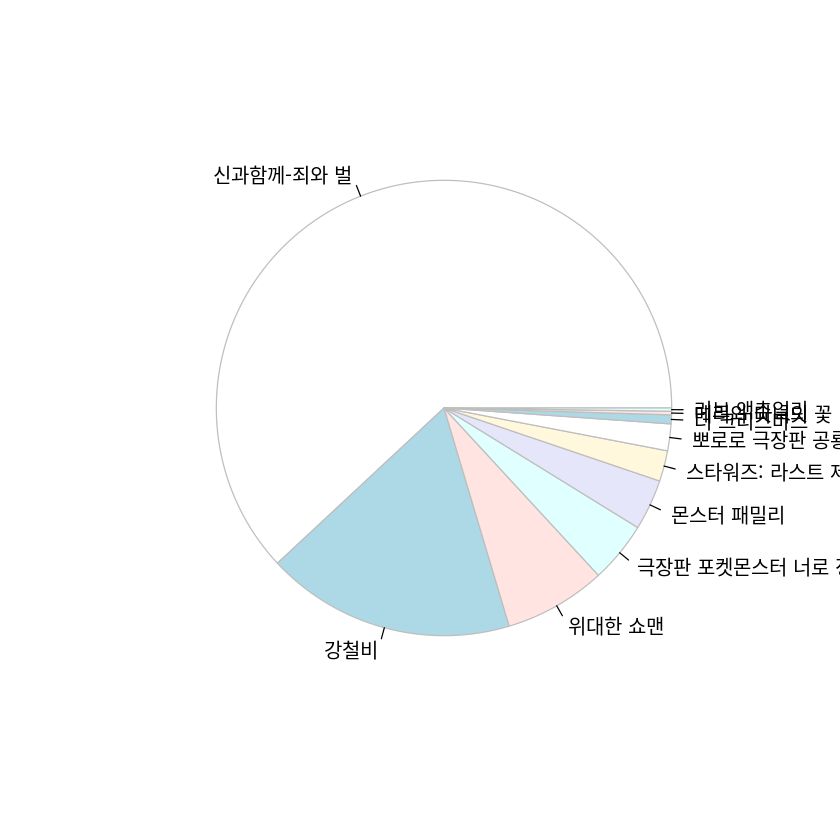

In [10]:
pie(data1, labels = data2  , border="grey" )

In [13]:
vector = c()
for(list in file_list){
    data = fromJSON(list)
    data = data.frame(data)
    data2 = as.numeric(data$boxOfficeResult.dailyBoxOfficeList.audiCnt)
#     data3 = as.character(data$boxOfficeResult.showRange[1])
#     data3 = substr(data3,1,8)
    sumdata <- sum(data2)
    vector <- append(vector,sumdata)
#     vector2 <- append(vector2, data3)
}

d_list = order(vector,decreasing = TRUE)[1:50]

In [14]:
for(li in d_list){
    print(file_list[[li]])
}


[1] "20171224.json"
[1] "20171225.json"
[1] "20170815.json"
[1] "20171231.json"
[1] "20170805.json"
[1] "20180101.json"
[1] "20170812.json"
[1] "20170129.json"
[1] "20170806.json"
[1] "20170813.json"
[1] "20171230.json"
[1] "20170130.json"
[1] "20170729.json"
[1] "20171223.json"
[1] "20171006.json"
[1] "20170606.json"
[1] "20171005.json"
[1] "20180106.json"
[1] "20180217.json"
[1] "20170730.json"
[1] "20170819.json"
[1] "20180107.json"
[1] "20170128.json"
[1] "20170820.json"
[1] "20170726.json"
[1] "20170505.json"
[1] "20170708.json"
[1] "20170802.json"
[1] "20171004.json"
[1] "20180113.json"
[1] "20171007.json"
[1] "20180120.json"
[1] "20170121.json"
[1] "20170122.json"
[1] "20180114.json"
[1] "20170814.json"
[1] "20171008.json"
[1] "20170503.json"
[1] "20170509.json"
[1] "20180216.json"
[1] "20180121.json"
[1] "20170709.json"
[1] "20170804.json"
[1] "20170803.json"
[1] "20180218.json"
[1] "20171003.json"
[1] "20170127.json"
[1] "20170101.json"
[1] "20170107.json"
[1] "20170325.json"
